<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/Multivariate_Logistic_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [2]:
digits=load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

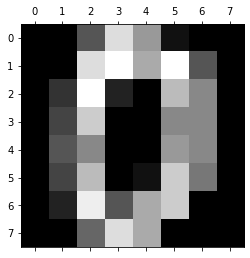

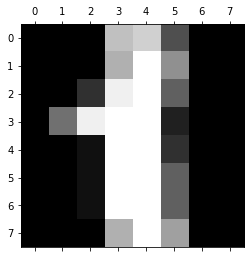

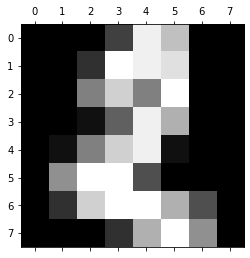

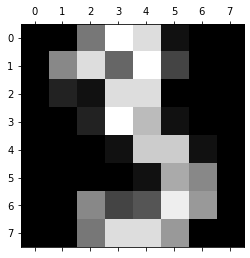

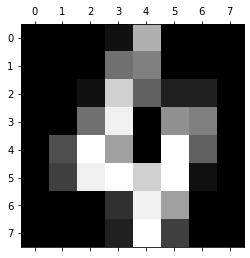

In [6]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

In [11]:
len(X_train)

1437

In [12]:
len(X_test)

360

In [14]:
from sklearn.linear_model import LogisticRegression

In [20]:
model=LogisticRegression(solver='lbfgs', max_iter=10000)

In [21]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
model.score(X_test,y_test)

0.9694444444444444

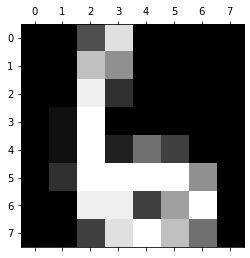

In [23]:
plt.matshow(digits.images[67])

In [24]:
digits.target[67]

6

In [26]:
model.predict([digits.data[67]])

array([6])

In [29]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [30]:
y_predicted=model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm= confusion_matrix(y_test,y_predicted)

In [33]:
cm

array([[39,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  1],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 29,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 38]])

Text(69.0, 0.5, 'Truth')

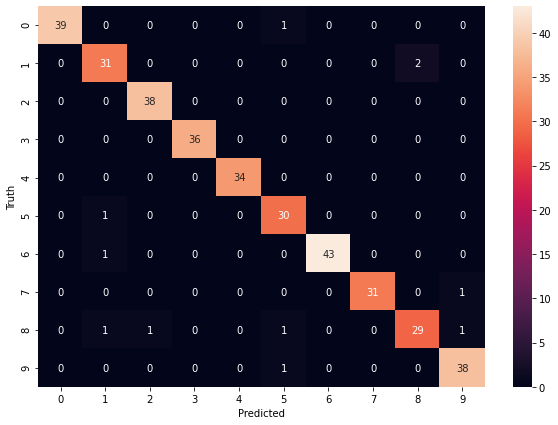

In [35]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')